# 0.0\_\_name\_\_的理解

In [ ]:
%run understand__name__.ipynb

In [ ]:
import import_ipynb
from understand__name__ import print_name

print('====== 在本文件中__name__的值： ======')
print_name()
print('====== 在本文件中__name__的值： ======')

# 1 创建进程
+ 跟threading一模一样

**不知道为什么，我的电脑无论在notebook中还是在pycharm中运行多进程都会报错**  
**解决方法： 把代码写到test.py文件中去cmd中运行,运行完就删**

In [ ]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
def job(a,b):
    print(a+b)
if __name__=='__main__':
    p1 = mp.Process(target=job,args=(1,2))
    p1.start()
    p1.join()
# ================================ 以上内容从jupyter notebook中写入 =========================================

# 2 Queue队列

In [ ]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
def job(a,b,q):
    c = a + b
    q.put(c)
if __name__=='__main__':
    q = mp.Queue()
    p1 = mp.Process(target=job,args=(1,2,q))
    p2 = mp.Process(target=job,args=(10,5,q))
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    result1 = q.get()
    result2 = q.get()
    print(result1, result2, result1+result2) 
# ================================ 以上内容从jupyter notebook中写入 =========================================

# 3 效率对比

In [56]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
import threading as td
import time

def job(start,end,step,q):
    res = 0
    for i in range(start,end+1,step):
        res += i + i**2 + i**3
    q.put(res)
    
    return res # 多线程没用
    
    
def normal(end):
    q = mp.Queue()
    res = job(1,end,1,q)
    print(res)
    

def multithread(end,thread_num):
    q = mp.Queue()
    thread_list = []
    total = 0
    
    for i in range(1,thread_num+1):
        t = td.Thread(target=job,args=(i,end,thread_num,q))
        thread_list.append(t)
    
    for t in thread_list:
        t.start()
    
    for thread in thread_list:
        t.join()
    
    for _ in range(thread_num):
        res = q.get()
        total += res

    print(total)

    
def multiprocess(end,process_num):
    q = mp.Queue()
    process_list = []
    total = 0
    
    for i in range(1,process_num+1):
        p = mp.Process(target=job,args=(i,end,process_num,q))
        process_list.append(p)
    
    for p in process_list:
        p.start()
    for p in process_list:
        p.join()
    
    for _ in range(process_num):
        res = q.get()
        total += res

    print(total)

    
if __name__=='__main__':
#     aim = 40000000
#     s0 = time.time()
#     normal(aim)
#     s1 = time.time()
#     print('正常耗时：', s1-s0)
#     multithread(aim,100)
#     s2 = time.time()
#     print('多线程耗时：', s2-s1)
#     multiprocess(aim,6)
#     s3 = time.time()
#     print('多进程耗时：', s3-s2)
    
    
    
    aim = 40000000
    for i in range(1,21):
        
        s0 = time.time()
        multiprocess(aim,i)
        s1 = time.time()
        print(f'{i}进程耗时：{s1-s0}')
# ================================ 以上内容从jupyter notebook中写入 =========================================

Writing test.py


# pool进程池
**创建一个池子，把参数设置好，程序会把每个参数都依次填入目标函数，然后加载到进程中。**  
**一个参数 ←→ 一个函数 ←→ 一个进程**

In [17]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
def job(x):
    return x**2

def multiprocess():
    # 1.设置好空的进程池
    pool = mp.Pool(processes=4) # 定义调用的核数 默认是全核
    
    
    # 2.1 map方法填入参数 丢入进程池
    res1 = pool.map(job,(2,4,6,8,10)) # (外部程序名,参数元组)
    print('res1结果：',res1)          # 返回总结果
    res2 = pool.map(job,range(1,11)) # (外部程序名,参数range)
    print('res2结果：',res2)          # 返回总结果
    
    
    # 2.2 apply_async方法 每次只能传一个参数，调用一个进程
    res3 = pool.apply_async(job,(2,)) # (外部程序名,(参数，))
    print('res3结果：',res3.get())    # get()返回单个结果
    
    
    # 2.3 apply_async方法的迭代循环
    res4 = [(pool.apply_async(job,(i,))) for i in (2,4,6,8,10)]
    print('res4结果：',[(a.get()) for a in res4])          # 迭代 返回 结果
    
    
if __name__ == '__main__':
    multiprocess()
# ================================ 以上内容从jupyter notebook中写入 =========================================

Writing test.py


**变量类型表**
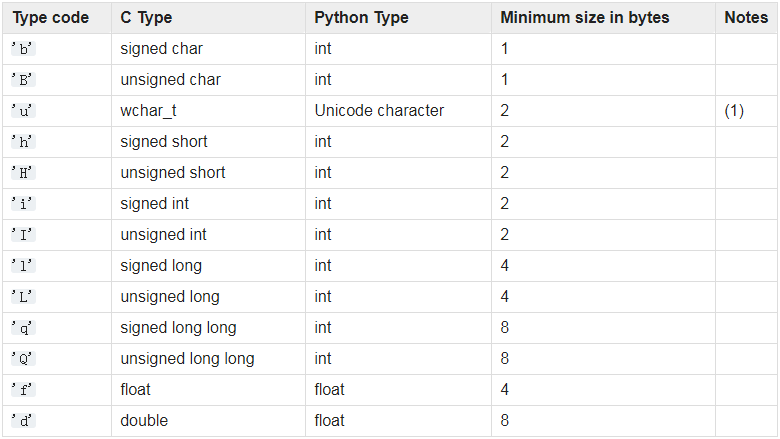
# shared memory共享内存
在CPU二级缓存和三级缓存中开辟缓存,作为**共享变量**的存储空间  
只能用这些**共享变量**进行CPU核心与核心之间的交流  
# lock 锁
不同于多线程，多进程是不支持全局变量的，进程与进程之间的交流只能通过共享内存。

In [62]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
def shared_memory():
    # 共享变量的定义:
    value = mp.Value('i', # 变量类型
                     1)    # 数值
    array = mp.Array('i',   # 变量类型
                    [1,2,3]) # 数值
    print(f'value: {value}\narray: {array}')
if __name__ == '__main__':
    shared_memory()
# ================================ 以上内容从jupyter notebook中写入 =========================================

Writing test.py


In [86]:
%%writefile test.py
# ================================ 以下内容从jupyter notebook中写入 =========================================
import multiprocessing as mp
  
# ----- 变量锁 -----
def job(v,math,lock):
    lock.acquire() # 上锁
    if math == '+':
        for _ in range(1000):
            v.value += 1
            print('＋后：   ',v.value)
    else:
        for _ in range(1000):
            v.value -= 1
            print('- 后：   ',v.value)
    lock.release() # 解锁

def multiprocess():
    # --- 变量锁 ---
    l = mp.Lock()

    v = mp.Value('i',0)
    p1 = mp.Process(target=job,args=(v,'+',l))
    p2 = mp.Process(target=job,args=(v,'-',l))
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    
if __name__ == '__main__':
    multiprocess()

# ================================ 以上内容从jupyter notebook中写入 =========================================

Writing test.py


# 运行命令

In [87]:
!python test.py
import os
os.remove('test.py') # 做个渣男 运行完就删掉

- 后：    -1
- 后：    -2
- 后：    -3
- 后：    -4
- 后：    -5
- 后：    -6
- 后：    -7
- 后：    -8
- 后：    -9
- 后：    -10
- 后：    -11
- 后：    -12
- 后：    -13
- 后：    -14
- 后：    -15
- 后：    -16
- 后：    -17
- 后：    -18
- 后：    -19
- 后：    -20
- 后：    -21
- 后：    -22
- 后：    -23
- 后：    -24
- 后：    -25
- 后：    -26
- 后：    -27
- 后：    -28
- 后：    -29
- 后：    -30
- 后：    -31
- 后：    -32
- 后：    -33
- 后：    -34
- 后：    -35
- 后：    -36
- 后：    -37
- 后：    -38
- 后：    -39
- 后：    -40
- 后：    -41
- 后：    -42
- 后：    -43
- 后：    -44
- 后：    -45
- 后：    -46
- 后：    -47
- 后：    -48
- 后：    -49
- 后：    -50
- 后：    -51
- 后：    -52
- 后：    -53
- 后：    -54
- 后：    -55
- 后：    -56
- 后：    -57
- 后：    -58
- 后：    -59
- 后：    -60
- 后：    -61
- 后：    -62
- 后：    -63
- 后：    -64
- 后：    -65
- 后：    -66
- 后：    -67
- 后：    -68
- 后：    -69
- 后：    -70
- 后：    -71
- 后：    -72
- 后：    -73
- 后：    -74
- 后：    -75
- 后：    -76
- 后：    -77
- 后：    -78
- 后：    -79
- 后：    -80
- 后：    -81
- 后：    -82
- 后：    -83
- 后：    -84
-

- 后：    -863
- 后：    -864
- 后：    -865
- 后：    -866
- 后：    -867
- 后：    -868
- 后：    -869
- 后：    -870
- 后：    -871
- 后：    -872
- 后：    -873
- 后：    -874
- 后：    -875
- 后：    -876
- 后：    -877
- 后：    -878
- 后：    -879
- 后：    -880
- 后：    -881
- 后：    -882
- 后：    -883
- 后：    -884
- 后：    -885
- 后：    -886
- 后：    -887
- 后：    -888
- 后：    -889
- 后：    -890
- 后：    -891
- 后：    -892
- 后：    -893
- 后：    -894
- 后：    -895
- 后：    -896
- 后：    -897
- 后：    -898
- 后：    -899
- 后：    -900
- 后：    -901
- 后：    -902
- 后：    -903
- 后：    -904
- 后：    -905
- 后：    -906
- 后：    -907
- 后：    -908
- 后：    -909
- 后：    -910
- 后：    -911
- 后：    -912
- 后：    -913
- 后：    -914
- 后：    -915
- 后：    -916
- 后：    -917
- 后：    -918
- 后：    -919
- 后：    -920
- 后：    -921
- 后：    -922
- 后：    -923
- 后：    -924
- 后：    -925
- 后：    -926
- 后：    -927
- 后：    -928
- 后：    -929
- 后：    -930
- 后：    -931
- 后：    -932
- 后：    -933
- 后：    -934
- 后：    -935
- 后：    -936
- 后：    -937
- 后：    -938
- 后：    -939